<a href="https://colab.research.google.com/github/iMuhammadAbdullahAwan/Computer_Vision/blob/main/Dynamic_Slip_Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-g2k6uq_h
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-g2k6uq_h
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=040e96660a910f45d3396647467f118c040304bdc63bc1ab99f6c946dc7f1646
  Stored in directory: /tmp/pip-ephem-wheel-cache-0rd6d8tj/wheels/29/82/ff/04e2be9805a1cb48bec0b85b5a6da6b63f647645750a0e42d4
Successfully built segment_anything


In [2]:
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

sam_checkpoint = "sam_vit_h_4b8939.pth"

# Download SAM weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# Load model
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
mask_generator = SamAutomaticMaskGenerator(sam)


In [3]:
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

sam_checkpoint = "sam_vit_h_4b8939.pth"

# Download SAM weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# Load model
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
mask_generator = SamAutomaticMaskGenerator(sam)


Saving slips.jpg to slips (1).jpg


(np.float64(-0.5), np.float64(1129.5), np.float64(1599.5), np.float64(-0.5))

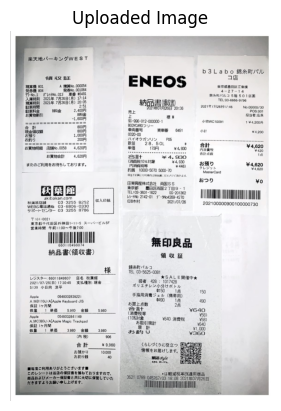

In [5]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Uploaded Image")
plt.axis("off")


In [6]:
masks = mask_generator.generate(image_rgb)
print("Total segments found:", len(masks))


Total segments found: 95


In [7]:
import numpy as np
import os

os.makedirs("cropped_slips", exist_ok=True)

index = 1
for mask in masks:
    bbox = mask['bbox']  # [x, y, w, h]
    x, y, w, h = bbox

    # filter criteria (adjust if needed)
    if w*h < 5000:  # remove tiny segments
        continue
    if w < 50 or h < 50:
        continue

    # crop slip
    crop = image[y:y+h, x:x+w]
    cv2.imwrite(f"cropped_slips/slip_{index}.jpg", crop)
    index += 1

print(f"{index-1} slips cropped and saved!")


20 slips cropped and saved!


In [8]:
!zip -r cropped_slips.zip cropped_slips
from google.colab import files
files.download("cropped_slips.zip")


  adding: cropped_slips/ (stored 0%)
  adding: cropped_slips/slip_12.jpg (deflated 2%)
  adding: cropped_slips/slip_6.jpg (deflated 5%)
  adding: cropped_slips/slip_20.jpg (deflated 1%)
  adding: cropped_slips/slip_8.jpg (deflated 1%)
  adding: cropped_slips/slip_14.jpg (deflated 3%)
  adding: cropped_slips/slip_5.jpg (deflated 1%)
  adding: cropped_slips/slip_19.jpg (deflated 3%)
  adding: cropped_slips/slip_13.jpg (deflated 4%)
  adding: cropped_slips/slip_7.jpg (deflated 4%)
  adding: cropped_slips/slip_18.jpg (deflated 4%)
  adding: cropped_slips/slip_1.jpg (deflated 1%)
  adding: cropped_slips/slip_9.jpg (deflated 1%)
  adding: cropped_slips/slip_16.jpg (deflated 1%)
  adding: cropped_slips/slip_15.jpg (deflated 2%)
  adding: cropped_slips/slip_4.jpg (deflated 1%)
  adding: cropped_slips/slip_10.jpg (deflated 3%)
  adding: cropped_slips/slip_3.jpg (deflated 1%)
  adding: cropped_slips/slip_11.jpg (deflated 2%)
  adding: cropped_slips/slip_17.jpg (deflated 4%)
  adding: cropped_sli

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>